**Importando bibliotecas**


In [2]:
import pandas as pd
from time import time
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

**Entendo como os datasets foram construídos.**

O dataset de treinamento foi extraído do Wikipedia Dogs Breeds e de artigos aleatórios do Wikipedia. Por outro lado, o dataset de teste é proveniente de duas fontes distintas. As amostras positivas são obtidas a partir deste repositório: [Link para o repositório](https://github.com/tmfilho/akcdata/blob/master/data/akc-data-latest.csv), enquanto as amostras negativas são provenientes desta base de dados: [Link para a base de dados](https://www.kaggle.com/datasets/ishikajohari/best-books-10k-multi-genre-data?resource=download).

A abordagem adotada é realizar um cross-dataset, ou seja, treinaremos o modelo na base de dados de domínio e o testaremos em uma base externa. Essa abordagem reflete a situação real do problema que estou buscando resolver no projeto de pesquisa.

In [3]:
#Carregando bases de dados.
train_csv = pd.read_csv('./train_data.csv')
# test_csv = pd.read_csv('./test_data.csv')
test_csv = pd.read_csv('../first-test/data/manual_labeled_test_dataset.csv')

#Definindo as colunas.
train_x = train_csv['text'].values.astype('U')
train_y = train_csv['isdog']
test_x = test_csv['text'].values.astype('U')
test_y = test_csv['isdog']

**Pré processamento nos dados**

In [4]:
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def preprocess_text(text):
    # Converte o texto para minúsculas
    text = text.lower()
    
    # Remove símbolos e caracteres especiais
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenização
    tokens = nltk.word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatização
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Junta os tokens novamente em uma única string
    processed_text = ' '.join(tokens)
    
    return processed_text


**Aplicando pré-processamento nos textos**

In [5]:
#Cria uma nova coluna na tabela com os textos limpos.
train_csv['text_clean'] = train_csv['text'].apply(preprocess_text)
test_csv['text_clean'] = test_csv['text'].apply(preprocess_text)

print(train_csv['text_clean'].head())

AttributeError: 'float' object has no attribute 'lower'

**Dividindo base de treinamento em: treinamento e validação**

In [ ]:
# from sklearn.model_selection import train_test_split

# train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.33, random_state=42)

Applying tf vectorizer (count vectorizer)

In [ ]:
t = time()

# tf_vectorizer = CountVectorizer() # or term frequency
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(train_x)

print(f'\nVocabulário: {len(tfidf_vectorizer.vocabulary_)} - {tfidf_vectorizer.vocabulary_}')
print(f'\nFeatures: {tfidf_vectorizer.get_feature_names_out()}')

X_train_tf = tfidf_vectorizer.fit_transform(train_x)

duration = time() - t
print("Time taken to extract features from training data : %f seconds" % (duration))
print("n_samples: %d, n_features: %d" % X_train_tf.shape)


Vocabulário: 12247 - {'the': 10688, 'affenpinscher': 722, 'also': 890, 'known': 6095, 'as': 1159, 'monkey': 7137, 'terrier': 10656, 'is': 5707, 'small': 9929, 'sized': 9873, 'like': 6443, 'toy': 10877, 'pinscher': 8208, 'breed': 1809, 'of': 7633, 'dog': 3525, 'that': 10685, 'originated': 7747, 'in': 5487, 'germany': 4717, 'with': 11673, 'distinctive': 3473, 'appearance': 1043, 'and': 962, 'charming': 2288, 'personality': 8092, 'has': 5086, 'gained': 4603, 'popularity': 8355, 'among': 931, 'lovers': 6583, 'worldwide': 11714, 'afghan': 725, 'hound': 5321, 'distinguished': 3477, 'by': 1976, 'its': 5744, 'thick': 10713, 'fine': 4305, 'silky': 9821, 'coat': 2517, 'tail': 10522, 'ring': 9172, 'curl': 3045, 'at': 1209, 'end': 3853, 'selectively': 9570, 'bred': 1807, 'for': 4407, 'unique': 11164, 'features': 4221, 'cold': 2536, 'mountains': 7194, 'afghanistan': 726, 'local': 6518, 'name': 7319, 'tāžī': 11098, 'spay': 10050, 'pashto': 7948, 'تاژي': 12120, 'سپی': 12131, 'or': 7718, 'sag': 9337,

In [ ]:
# t = time()
# X_val_tf = tf_vectorizer.transform(val_x)
# duration = time() - t
# print("Time taken to extract features from training data : %f seconds" % (duration))
# print("n_samples: %d, n_features: %d" % X_val_tf.shape)

Transforming test data into tf-vectorized matrix

É utilizando fit_transform() para a base de treino porque é ela que vai definir o quantidade de features, ou seja, o tamanho da matriz gerada, e com isso podemos aplicar o transform() na base de dados. Dessa maneira, já temos o valor definido anteriormente e depois só utilizamos ele como parâmetro.

In [ ]:
t = time()

X_test_tf = tfidf_vectorizer.transform(test_x)

duration = time() - t
print("Time taken to extract features from test data : %f seconds" % (duration))
print("n_samples: %d, n_features: %d" % X_test_tf.shape)

Time taken to extract features from test data : 0.168010 seconds
n_samples: 552, n_features: 12247


**Applying Naive Bayes**

In [ ]:
t = time()

#Construindo o modelo de classificação.
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_tf, train_y)

training_time = time() - t
print("train time: %0.3fs" % training_time)

train time: 0.008s


In [ ]:
# y_pred = naive_bayes_classifier.predict(X_val_tf)
# ConfusionMatrixDisplay.from_predictions(val_y, y_pred, normalize='true')

Calculating accuracy and generating classification report from test data

In [ ]:
t = time()
y_pred = naive_bayes_classifier.predict(X_test_tf)

Confusion Matrix

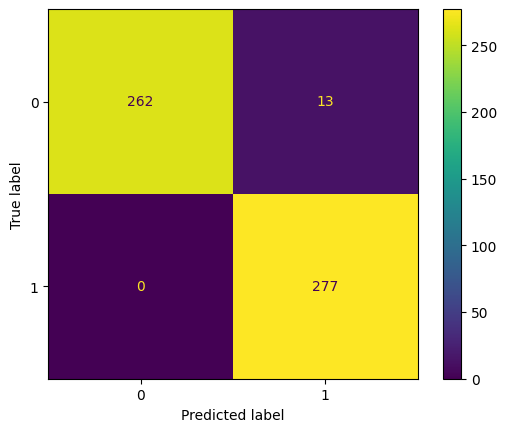

In [ ]:
ConfusionMatrixDisplay.from_predictions(test_y, y_pred)

Printing metrics.

In [ ]:
test_time = time() - t
print("test time:  %0.3fs" % test_time)

# compute the performance measures
score1 = metrics.accuracy_score(test_y, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(test_y, y_pred, target_names=['Positive', 'Negative']))

test time:  0.419s
accuracy:   0.976
              precision    recall  f1-score   support

    Positive       1.00      0.95      0.98       275
    Negative       0.96      1.00      0.98       277

    accuracy                           0.98       552
   macro avg       0.98      0.98      0.98       552
weighted avg       0.98      0.98      0.98       552



accuracy:   0.920
              precision    recall  f1-score   support

    Positive       0.98      0.86      0.92       589
    Negative       0.87      0.98      0.92       589

    accuracy                           0.92      1178
   macro avg       0.93      0.92      0.92      1178
weighted avg       0.93      0.92      0.92      1178



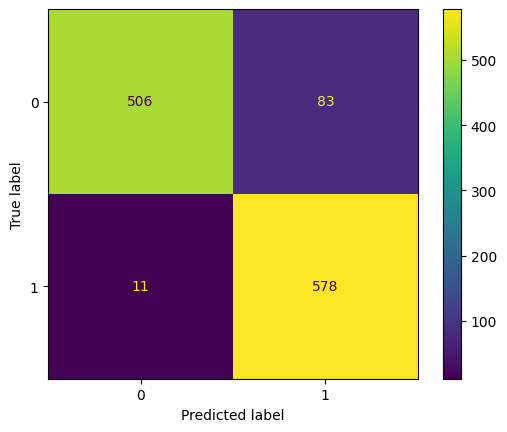

In [ ]:
X_test_tf = tfidf_vectorizer.fit_transform(train_x)
X_train_tf = tfidf_vectorizer.transform(test_x)
new_test_y, new_train_y = train_y, test_y

naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_tf, new_train_y)
y_pred = naive_bayes_classifier.predict(X_test_tf)
ConfusionMatrixDisplay.from_predictions(new_test_y, y_pred)
score1 = metrics.accuracy_score(new_test_y, y_pred)
print("accuracy:   %0.3f" % score1)
print(metrics.classification_report(new_test_y, y_pred, target_names=['Positive', 'Negative']))

### Testando o classificador com os textos alternativos das imagens.

#### Base de treino: Wikipedia (Dogs Breeds) + Wikipedia (Random).

In [ ]:
#Carregando base de teste.
test_csv = pd.read_csv('../gazetteer-classifier/data/manual_labeled_test_dataset.csv')
print(train_csv)

                                                   text  isdog  \
0     The Affenpinscher, also known as the Monkey Te...      1   
1     The Afghan Hound is a Hound distinguished by i...      1   
2     The Africanis is a dog landrace found across s...      1   
3     The Aidi (Berber languages: ⴰⵢⴷⵉ, romanized: a...      1   
4     The Airedale Terrier (often shortened to "Aire...      1   
...                                                 ...    ...   
1173  Charlotte's Web is a 2006 adventure game based...      0   
1174  Glory was an East Indiaman launched in 1802. S...      0   
1175  Copper columns of Ma Yuan (Vietnamese: Cột đồn...      0   
1176  The Battle of Cefn Digoll, also known as the B...      0   
1177  Jared David Warner (born 14 November 1996) is ...      0   

                                             text_clean  
0     Affenpinscher also known Monkey Terrier smalls...  
1     Afghan Hound Hound distinguished thick fine si...  
2     Africanis dog landrace foun